# Furrier Serries

Freq = 1/2pi (cycles/sec) Hz

<img src="furrier1.png">

In [ ]:
If a1>a2 :  it means that function contains a lot more of the 1/2pi hertz frequency than 1/pi frequency.

<img src="furrier2.png">

### f(x) is the function we want (such as a square wave)
### L is half of the period of the function (if we had 2p, l would be all of period)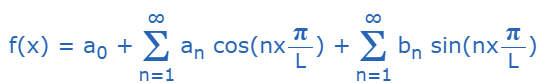
### a0, an and bn are coefficients that we need to calculate!
<img src="formula.png">

### it is summation of sin and cos
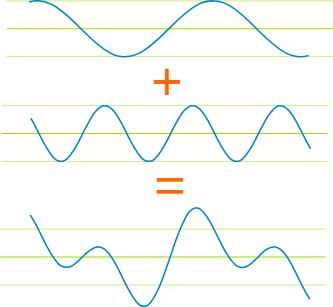

### Power Spectrum Analysis
Power spectrum analysis is a technique that applies a fast Fourier transform (FFT) to the variation of a particular signal to compute its frequency spectrum. The result is presented as a plot of signal power against frequency and is referred to as its power spectrum. The power spectrum of a signal indicates the relative magnitudes of the frequency components that combine to make up the signal.

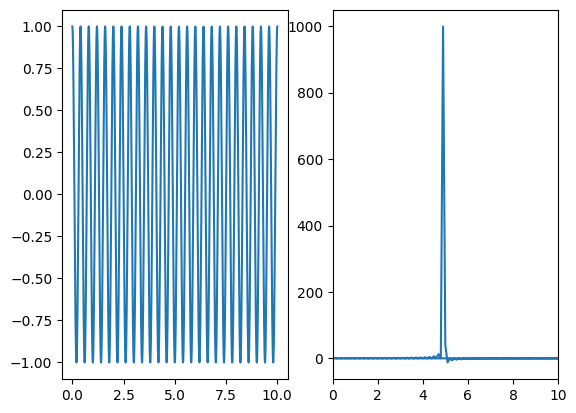

In [7]:
import numpy as np
from scipy.fftpack import rfft, irfft, fftfreq

time   = np.linspace(0,10,2000)
signal = np.cos(5*np.pi*time)

W = fftfreq(signal.size, d=time[1]-time[0])
f_signal = rfft(signal)

import pylab as plt
plt.subplot(121)
plt.plot(time,signal)
plt.subplot(122)
plt.plot(W,f_signal)
plt.xlim(0,10)
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, sin, cos, Fit

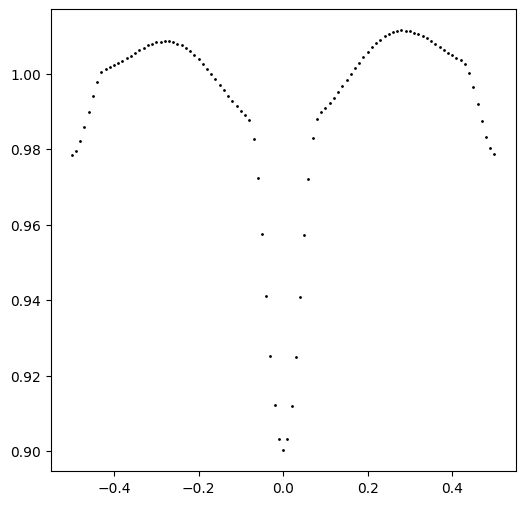

In [2]:
#---------------- sample 1 ---------------------------
# Create a dependent test variable to define the x-axis of the test data.
n_bins = 101
test_array = np.linspace(0, 1, n_bins) - 0.5

# Define some test data to try to apply a Fourier series to.
test_data = [0.9783883464566918, 0.979599093567252, 0.9821424606299206, 0.9857575507812502, 0.9899278899999995,
             0.9941848228346452, 0.9978438300395263, 1.0003009205426352, 1.0012208923679058, 1.0017130521235522,
             1.0021799664031628, 1.0027475606936413, 1.0034168260869563, 1.0040914266144825, 1.0047781181102355,
             1.005520348837209, 1.0061899214145387, 1.006846206627681, 1.0074483048543692, 1.0078691461988312,
             1.008318736328125, 1.008446947572815, 1.00862051262136, 1.0085134881422921, 1.008337095516569,
             1.0079539881889774, 1.0074857334630352, 1.006747783037474, 1.005962048923679, 1.0049115434782612,
             1.003812267822736, 1.0026427549407106, 1.001251963531669, 0.999898555335968, 0.9984976286266923,
             0.996995982142858, 0.9955652088974847, 0.9941647321428578, 0.9927727076023389, 0.9914750532544377,
             0.990212467710371, 0.9891098035363466, 0.9875998927875242, 0.9828093773946361, 0.9722532524271845,
             0.9574084365384614, 0.9411012303149601, 0.9251820309477757, 0.9121488392156851, 0.9033119748549322,
             0.9002445803921568, 0.9032760564202343, 0.91192435882353, 0.9249696964980555, 0.94071381372549,
             0.957139088974855, 0.9721083392156871, 0.982955287937743, 0.9880613320235758, 0.9897455322896282,
             0.9909590626223097, 0.9922601592233015, 0.9936513112840472, 0.9951442427184468, 0.9967071285988475,
             0.9982921493123781, 0.9998775465116277, 1.001389230174081, 1.0029109110251453, 1.0044033691406251,
             1.0057110841487276, 1.0069551867704276, 1.008118776264591, 1.0089884470588228, 1.0098663972602735,
             1.0104514566473979, 1.0109849223300964, 1.0112043902912626, 1.0114717968750002, 1.0113343036750482,
             1.0112205972495087, 1.0108811786407768, 1.010500276264591, 1.0099054552529192, 1.009353759223301,
             1.008592596116505, 1.007887223091976, 1.0070715634615386, 1.0063525891472884, 1.0055587861271678,
             1.0048733732809436, 1.0041832862669238, 1.0035913326848247, 1.0025318871595328, 1.000088536345776,
             0.9963596140350871, 0.9918380684931506, 0.9873937281553398, 0.9833394624277463, 0.9803621496062999,
             0.9786476100386117]

# Create a figure to view the data.
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot the data.
ax.scatter(test_array, test_data, color="k", s=1)

In [3]:
def fourier_series(x, f, n=0):
    """
    Returns a symbolic fourier series of order `n`.

    :param n: Order of the fourier series.
    :param x: Independent variable
    :param f: Frequency of the fourier series
    """
    # Make the parameter objects for all the terms
    a0, *cos_a = parameters(','.join(['a{}'.format(i) for i in range(0, n + 1)]))
    sin_b = parameters(','.join(['b{}'.format(i) for i in range(1, n + 1)]))
    # Construct the series
    series = a0 + sum(ai * cos(i * f * x) + bi * sin(i * f * x)
                     for i, (ai, bi) in enumerate(zip(cos_a, sin_b), start=1))
    return series

x, y = variables('x, y')
w, = parameters('w')
model_dict = {y: fourier_series(x, f=w, n=3)}
print(model_dict)

{y: a0 + a1*cos(w*x) + a2*cos(2*w*x) + a3*cos(3*w*x) + b1*sin(w*x) + b2*sin(2*w*x) + b3*sin(3*w*x)}



Parameter Value        Standard Deviation
a0        9.848742e-01 7.293821e-04
a1        -3.631668e-02 1.073584e-03
a2        -1.891458e-02 1.018477e-03
a3        -1.193916e-02 1.008669e-03
b1        2.766883e-04 9.289039e-04
b2        -6.020918e-05 9.699356e-04
b3        -1.282455e-05 9.903409e-04
w         -1.101679e+01 6.995198e-02
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   230
Objective              <symfit.core.objectives.LeastSquares object at 0x0000025CE132BCD0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x0000025CE132BC10>

Goodness of fit qualifiers:
chi_squared            0.0043620809370999245
objective_value        0.0021810404685499623
r_squared              0.9353114713163923


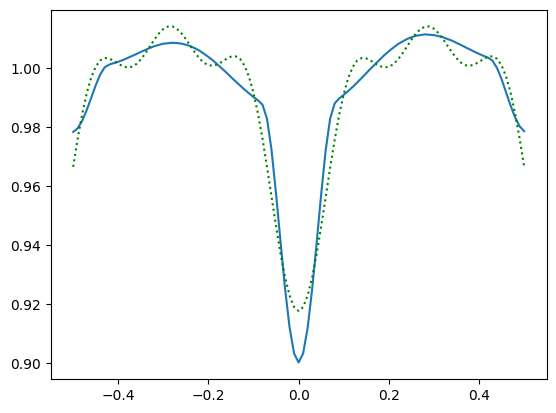

In [4]:
# test_array
# Define a Fit object for this model and data
fit = Fit(model_dict, x=test_array, y=test_data)
fit_result = fit.execute()
print(fit_result)

# Plot the result
plt.plot(test_array, test_data)
plt.plot(test_array, fit.model(x=test_array, **fit_result.params).y, color='green', ls=':')

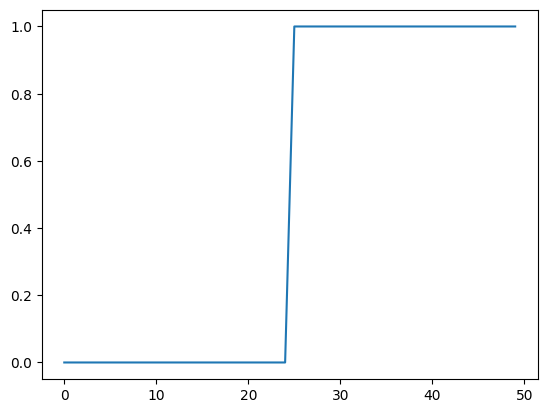

In [5]:
#---------------- sample 2 ---------------------------
xdata = np.linspace(-np.pi, np.pi)

ydata = np.zeros_like(xdata)
# print(ydata)
ydata[xdata > 0] = 1
plt.plot(ydata)


Parameter Value        Standard Deviation
a0        5.000000e-01 2.075395e-02
a1        5.734912e-12 3.277426e-02
a2        6.124946e-12 3.197889e-02
a3        3.243899e-12 3.080979e-02
b1        6.267589e-01 2.548585e-02
b2        1.986491e-02 2.643438e-02
b3        1.846406e-01 2.756060e-02
w         8.671471e-01 3.356602e-02
Status message         Optimization terminated successfully.
Number of iterations   25
Objective              <symfit.core.objectives.LeastSquares object at 0x0000025CE17C74F0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x0000025CE17C78E0>

Goodness of fit qualifiers:
chi_squared            0.7478591086418304
objective_value        0.3739295543209152
r_squared              0.9401712713086535


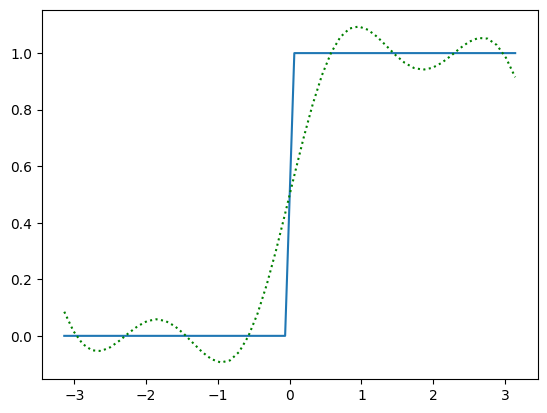

In [6]:
# Define a Fit object for this model and data
fit = Fit(model_dict, x=xdata, y=ydata)
fit_result = fit.execute()
print(fit_result)

# Plot the result
plt.plot(xdata, ydata)
plt.plot(xdata, fit.model(x=xdata, **fit_result.params).y, color='green', ls=':')